In [1]:
# Core libraries and model APIs
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier



In [2]:
df = pd.read_excel('ctg.xlsx', sheet_name = 'Data', header = 1)
df

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,NaN,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,5.0,NaN,2.0
2125,2796.0,3415.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,1.0,NaN,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,72.0,332.0,252.0,107.0,69.0,197.0,NaN,NaN,NaN,NaN


In [3]:
cleaned = df.copy()
cleaned = cleaned.dropna(axis=0, how='all').dropna(axis=1, how='all')

#remove 1 row and 4 columns that are completely empty
cleaned

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,9.0,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,133.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,134.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,1576.0,2596.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,140.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,2.0
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,140.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,2.0
2125,2796.0,3415.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,142.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2127,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,53.0,81.0,72.0,332.0,252.0,107.0,69.0,197.0,NaN,NaN


In [4]:
target_col = 'NSP'
label_leak_cols = ['CLASS', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'Mean']
# label_leak_cols = ['CLASS', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'AC.1', 'FM.1', 'UC.1', 'DL.1', 'DS.1']
feature_cols = [col for col in cleaned.columns if col not in label_leak_cols + [target_col]]
# feature_cols = ['DP', 'ASTV', 'ALTV', 'AC', 'MSTV', 'Mean', 'Median', 'Mode', 'LB', 'Variance']

print(feature_cols)

['b', 'e', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR', 'LB', 'AC.1', 'FM.1', 'UC.1', 'DL.1', 'DS.1', 'DP.1', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Median', 'Variance', 'Tendency']


In [5]:
cleaned = cleaned.drop(columns = label_leak_cols)
cleaned.columns

Index(['b', 'e', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR', 'LB', 'AC.1',
       'FM.1', 'UC.1', 'DL.1', 'DS.1', 'DP.1', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
       'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Median', 'Variance',
       'Tendency', 'NSP'],
      dtype='object')

In [6]:
cleaned

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,Width,Min,Max,Nmax,Nzeros,Mode,Median,Variance,Tendency,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,...,64.0,62.0,126.0,2.0,0.0,120.0,121.0,73.0,1.0,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,132.0,...,130.0,68.0,198.0,6.0,1.0,141.0,140.0,12.0,0.0,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,133.0,...,130.0,68.0,198.0,5.0,1.0,141.0,138.0,13.0,0.0,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,134.0,...,117.0,53.0,170.0,11.0,0.0,137.0,137.0,13.0,1.0,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,132.0,...,117.0,53.0,170.0,9.0,0.0,137.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,1576.0,2596.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,140.0,...,67.0,103.0,170.0,5.0,0.0,153.0,152.0,4.0,1.0,2.0
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,140.0,...,66.0,103.0,169.0,6.0,0.0,152.0,151.0,4.0,1.0,2.0
2125,2796.0,3415.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,142.0,...,42.0,117.0,159.0,2.0,1.0,145.0,145.0,1.0,0.0,1.0
2127,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
cleaned = cleaned.drop_duplicates()

In [8]:
cleaned

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,Width,Min,Max,Nmax,Nzeros,Mode,Median,Variance,Tendency,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,...,64.0,62.0,126.0,2.0,0.0,120.0,121.0,73.0,1.0,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,132.0,...,130.0,68.0,198.0,6.0,1.0,141.0,140.0,12.0,0.0,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,133.0,...,130.0,68.0,198.0,5.0,1.0,141.0,138.0,13.0,0.0,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,134.0,...,117.0,53.0,170.0,11.0,0.0,137.0,137.0,13.0,1.0,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,132.0,...,117.0,53.0,170.0,9.0,0.0,137.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,1576.0,2596.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,140.0,...,67.0,103.0,170.0,5.0,0.0,153.0,152.0,4.0,1.0,2.0
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,140.0,...,66.0,103.0,169.0,6.0,0.0,152.0,151.0,4.0,1.0,2.0
2125,2796.0,3415.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,142.0,...,42.0,117.0,159.0,2.0,1.0,145.0,145.0,1.0,0.0,1.0
2127,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
cleaned = cleaned.dropna(subset=[target_col])

In [10]:
cleaned

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,Width,Min,Max,Nmax,Nzeros,Mode,Median,Variance,Tendency,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,...,64.0,62.0,126.0,2.0,0.0,120.0,121.0,73.0,1.0,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,132.0,...,130.0,68.0,198.0,6.0,1.0,141.0,140.0,12.0,0.0,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,133.0,...,130.0,68.0,198.0,5.0,1.0,141.0,138.0,13.0,0.0,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,134.0,...,117.0,53.0,170.0,11.0,0.0,137.0,137.0,13.0,1.0,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,132.0,...,117.0,53.0,170.0,9.0,0.0,137.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2059.0,2867.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,140.0,...,40.0,137.0,177.0,4.0,0.0,153.0,152.0,2.0,0.0,2.0
2122,1576.0,2867.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,140.0,...,66.0,103.0,169.0,6.0,0.0,152.0,151.0,3.0,1.0,2.0
2123,1576.0,2596.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,140.0,...,67.0,103.0,170.0,5.0,0.0,153.0,152.0,4.0,1.0,2.0
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,140.0,...,66.0,103.0,169.0,6.0,0.0,152.0,151.0,4.0,1.0,2.0


In [11]:
# Final clean data
X = cleaned[feature_cols]
y = cleaned[target_col]

In [12]:
try:
    from imblearn.over_sampling import SMOTE
except ImportError:
    SMOTE = None

# smote = SMOTE(random_state=42, sampling_strategy='not majority')
# X_resampled, y_resampled = smote.fit_resample(X, y)
# print('Original shape:', X.shape, y.value_counts().to_dict())
# print('Resampled shape:', X_resampled.shape, pd.Series(y_resampled).value_counts().to_dict())

# X, y = X_resampled, y_resampled

In [13]:
X

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Median,Variance,Tendency
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,...,2.4,64.0,62.0,126.0,2.0,0.0,120.0,121.0,73.0,1.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,132.0,...,10.4,130.0,68.0,198.0,6.0,1.0,141.0,140.0,12.0,0.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,133.0,...,13.4,130.0,68.0,198.0,5.0,1.0,141.0,138.0,13.0,0.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,134.0,...,23.0,117.0,53.0,170.0,11.0,0.0,137.0,137.0,13.0,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,132.0,...,19.9,117.0,53.0,170.0,9.0,0.0,137.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2059.0,2867.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,140.0,...,7.2,40.0,137.0,177.0,4.0,0.0,153.0,152.0,2.0,0.0
2122,1576.0,2867.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,140.0,...,7.1,66.0,103.0,169.0,6.0,0.0,152.0,151.0,3.0,1.0
2123,1576.0,2596.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,140.0,...,6.1,67.0,103.0,170.0,5.0,0.0,153.0,152.0,4.0,1.0
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,140.0,...,7.0,66.0,103.0,169.0,6.0,0.0,152.0,151.0,4.0,1.0


In [14]:
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: NSP, Length: 2115, dtype: float64

In [15]:
# --- 1. Train/test split with stratification ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 30% of data reserved for testing
    random_state=41,        # reproducibility
    stratify=y              # preserve class distribution in both splits
)

In [16]:
smote = SMOTE(random_state=42, sampling_strategy='not majority')
X_train, y_train = smote.fit_resample(X_train, y_train)

In [17]:
classes = np.unique(y_train)
class_weight_values = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weight_values))
sample_weight_train = compute_sample_weight(class_weight='balanced', y=y_train)


In [18]:
# --- 4. Summarize distribution of splits ---
distribution = (
    pd.DataFrame({
        'Split': ['Train', 'Test'],
        'Size': [len(y_train), len(y_test)],               # number of samples
        'Normal (1)': [np.mean(y_train == 1), np.mean(y_test == 1)],
        'Suspect (2)': [np.mean(y_train == 2), np.mean(y_test == 2)],
        'Pathologic (3)': [np.mean(y_train == 3), np.mean(y_test == 3)]
        # compute class proportions in each split
    })
    .rename(columns=lambda c: c if c in {'Split', 'Size'} else f'{c} proportion')
)

# --- 5. Output: class distribution and weights ---
distribution


,Split,Size,Normal (1) proportion,Suspect (2) proportion,Pathologic (3) proportion
0,Train,3954,0.333333,0.333333,0.333333
1,Test,423,0.777778,0.139480,0.082742


In [19]:
# --- 2. Compute class weights (to handle imbalance) ---
classes = np.unique(y_train)    # get unique classes (1, 2, 3)
class_weight_values = compute_class_weight(
    class_weight='balanced',    # balance weights based on frequency
    classes=classes,
    y=y_train
)
class_weight_dict = dict(zip(classes, class_weight_values))

In [20]:
class_weight_dict

{1.0: 1.0, 2.0: 1.0, 3.0: 1.0}

In [21]:
from sklearn.metrics import (
    recall_score,
    classification_report,
    balanced_accuracy_score,
    f1_score,
    ConfusionMatrixDisplay
)

results = []

def evaluate_model(name, estimator, X_train, y_train, X_test, y_test, fit_kwargs=None, display_report=False):
    fit_kwargs = fit_kwargs or {}
    estimator.fit(X_train, y_train, **fit_kwargs)
    y_pred = estimator.predict(X_test)

    # Standard metrics
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    results.append({'Model': name, 'Balanced Accuracy': bal_acc, 'F1 Macro': f1})
    print(f"{name} — Balanced Accuracy: {bal_acc:.3f}, Macro F1: {f1:.3f}")

    # NSP=3 recall
    recall_nsp3 = recall_score(y_test, y_pred, labels=[3], average='macro', zero_division=0)
    print(f"NSP 3 Recall: {recall_nsp3:.3%}")

    # NSP=3 misclassified as NSP=1
    true_nsp3 = (y_test == 3)
    if true_nsp3.sum() > 0:
        nsp3_as1 = np.sum((y_test == 3) & (y_pred == 1))
        mis_as1_pct = nsp3_as1 / true_nsp3.sum()
        print(f"NSP 3 → predicted as NSP 1: {mis_as1_pct:.3%}")
    else:
        print("No NSP 3 samples in test set.")

    # Optional detailed report
    if display_report:
        print(classification_report(y_test, y_pred, digits=3))

    # Confusion matrix
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, display_labels=sorted(classes), normalize='true', cmap='Blues'
    )
    disp.ax_.set_title(f"{name} — Normalized Confusion Matrix")
    plt.show()

    return estimator, y_pred

Random Forest — Balanced Accuracy: 0.916, Macro F1: 0.891
NSP 3 Recall: 100.000%
NSP 3 → predicted as NSP 1: 0.000%


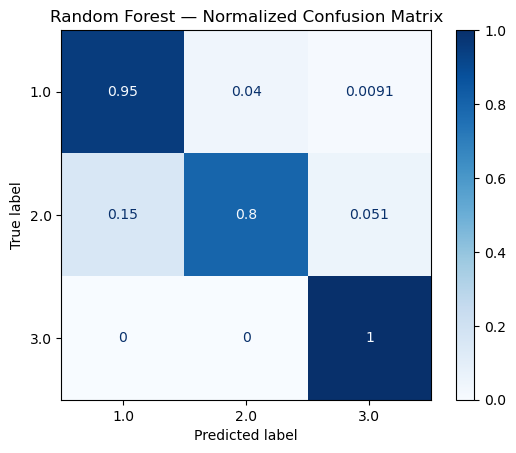

NSP 3 cases misclassified as NSP 1:
Empty DataFrame
Columns: [b, e, AC, FM, UC, DL, DS, DP, DR, LB, AC.1, FM.1, UC.1, DL.1, DS.1, DP.1, ASTV, MSTV, ALTV, MLTV, Width, Min, Max, Nmax, Nzeros, Mode, Median, Variance, Tendency, True Label, Predicted]
Index: []

[0 rows x 31 columns]

Total NSP3→NSP1 misclassifications: 0


In [22]:
# rf_pipeline = Pipeline(steps=[
#     ('rf', RandomForestClassifier(
#         n_estimators=300,
#         max_depth=None,
#         min_samples_leaf=4,
#         class_weight='balanced',
#         random_state=42,
#         n_jobs=-1
#     ))
# ])
# _ = evaluate_model('Random Forest', rf_pipeline, X_train, y_train, X_test, y_test)

# Train and evaluate as usual
rf_pipeline = Pipeline(steps=[
    ('rf', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=4,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

# Capture returned estimator and predictions
fitted_model, y_pred = evaluate_model('Random Forest', rf_pipeline, X_train, y_train, X_test, y_test)

# Now get NSP3 → NSP1 errors
mask_nsp3_as1 = (y_test == 3) & (y_pred == 1)

confused_samples = X_test.loc[mask_nsp3_as1].copy()
confused_samples['True Label'] = y_test[mask_nsp3_as1]
confused_samples['Predicted'] = y_pred[mask_nsp3_as1]

print("NSP 3 cases misclassified as NSP 1:")
print(confused_samples)
print(f"\nTotal NSP3→NSP1 misclassifications: {mask_nsp3_as1.sum()}")


Random Forest — Balanced Accuracy: 0.916, Macro F1: 0.891
NSP 3 Recall: 100.000%
NSP 3 → predicted as NSP 1: 0.000%


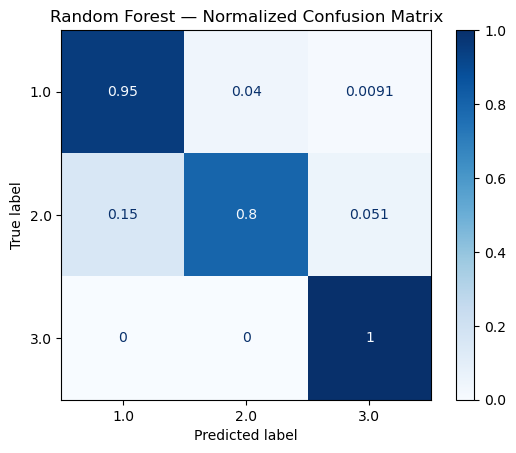

Bagging (Decision Trees) — Balanced Accuracy: 0.889, Macro F1: 0.858
NSP 3 Recall: 97.143%
NSP 3 → predicted as NSP 1: 2.857%


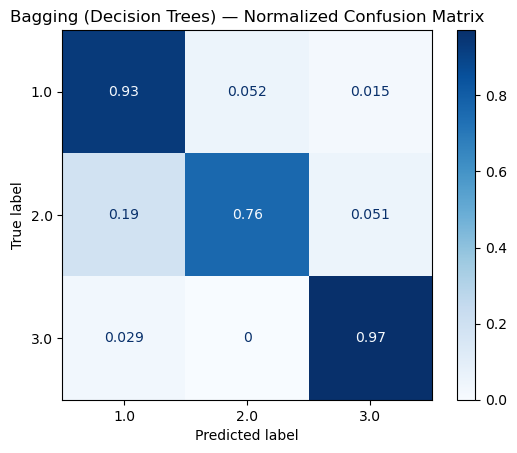

Bagging (Random Forest) — Balanced Accuracy: 0.898, Macro F1: 0.859
NSP 3 Recall: 97.143%
NSP 3 → predicted as NSP 1: 2.857%


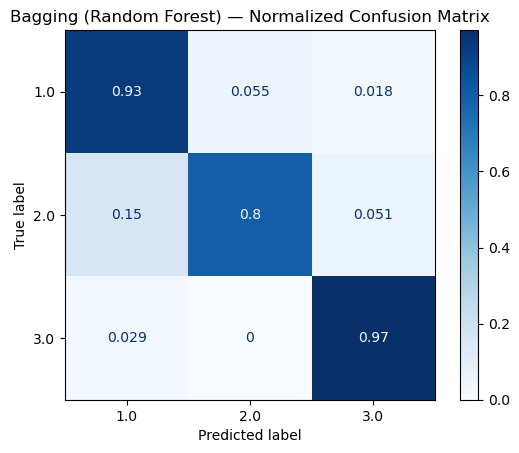

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# --- Random Forest (your version, slightly cleaner) ---
rf_pipeline = Pipeline(steps=[
    ('rf', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=4,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])
_ = evaluate_model('Random Forest', rf_pipeline, X_train, y_train, X_test, y_test)


# --- Bagging with Decision Trees (classic bagging) ---
bagging_dt_pipeline = Pipeline(steps=[
    ('bagging', BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=None, min_samples_leaf=4, random_state=42),
        n_estimators=300,   # number of base learners
        max_samples=0.8,    # % of training samples for each bootstrap
        max_features=1.0,   # % of features each learner sees
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    ))
])
_ = evaluate_model('Bagging (Decision Trees)', bagging_dt_pipeline, X_train, y_train, X_test, y_test)


# --- Bagging with Random Forest as base learner (what your paper tested) ---
bagging_rf_pipeline = Pipeline(steps=[
    ('bagging', BaggingClassifier(
        estimator=RandomForestClassifier(
            n_estimators=100,      # smaller forest inside bagging
            max_depth=None,
            min_samples_leaf=4,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        ),
        n_estimators=50,   # number of Random Forest models in the bagging ensemble
        max_samples=0.8,
        max_features=1.0,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    ))
])
_ = evaluate_model('Bagging (Random Forest)', bagging_rf_pipeline, X_train, y_train, X_test, y_test)


In [24]:
# gb_pipeline = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('gb', GradientBoostingClassifier(
#         n_estimators=300,
#         learning_rate=0.05,
#         max_depth=3,
#         random_state=42
#     ))
# ])
# gb_fit_kwargs = {'gb__sample_weight': sample_weight_train}
# _ = evaluate_model('Gradient Boosting', gb_pipeline, X_train, y_train, X_test, y_test, fit_kwargs=gb_fit_kwargs)

In [25]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform, randint
# import numpy as np

# # Define pipeline
# gb_pipeline = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('gb', GradientBoostingClassifier(random_state=42))
# ])

# # Parameter space
# param_dist = {
#     'gb__n_estimators': randint(100, 600),       # number of boosting stages
#     'gb__learning_rate': uniform(0.01, 0.2),    # shrinkage
#     'gb__max_depth': randint(2, 6),             # depth of individual trees
#     'gb__min_samples_split': randint(2, 20),    # min samples per split
#     'gb__min_samples_leaf': randint(1, 10),     # min samples per leaf
#     'gb__subsample': uniform(0.7, 0.3)          # row subsampling (0.7–1.0)
# }

# # Randomized search
# search = RandomizedSearchCV(
#     gb_pipeline,
#     param_distributions=param_dist,
#     n_iter=50,                     # try 50 random combos
#     scoring='f1_macro',            # balanced metric
#     cv=5,                          # 5-fold CV
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# # Fit search (with sample weights for imbalance handling)
# search.fit(X_train, y_train, gb__sample_weight=sample_weight_train)

# # Report best parameters
# print("Best parameters:", search.best_params_)
# print("Best CV Macro-F1:", search.best_score_)


Neural Network (MLP) — Balanced Accuracy: 0.882, Macro F1: 0.865
NSP 3 Recall: 91.429%
NSP 3 → predicted as NSP 1: 2.857%


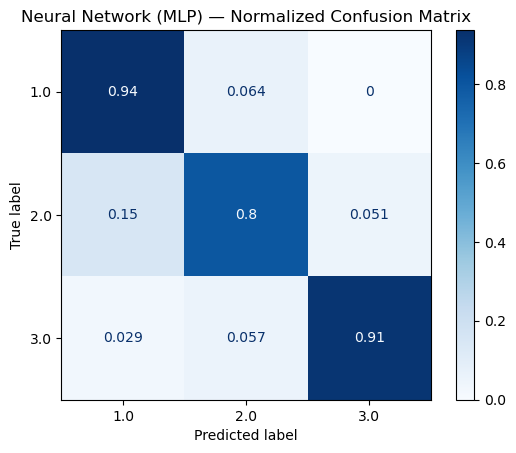

In [26]:
mlp_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(2048, 1024, 512, 256, 128),
        activation='relu',
        alpha=1e-3,
        learning_rate='adaptive',
        max_iter=1000,
        early_stopping=True,
        random_state=42
    ))
])
_ = evaluate_model('Neural Network (MLP)', mlp_pipeline, X_train, y_train, X_test, y_test)

Neural Network (MLP) — Balanced Accuracy: 0.875, Macro F1: 0.876
NSP 3 Recall: 91.429%
NSP 3 → predicted as NSP 1: 2.857%


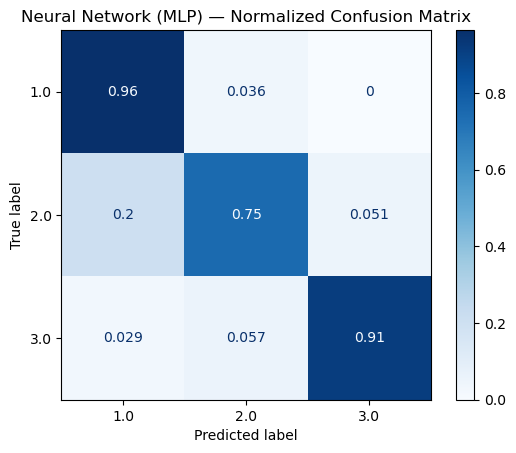

In [27]:
mlp_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(1024, 512, 256, 128),  # shallower pyramid
        activation='relu',
        alpha=1e-2,                                # stronger L2 regularization
        learning_rate_init=5e-4,                   # smaller learning rate
        learning_rate='adaptive',
        max_iter=1000,
        early_stopping=True,
        random_state=42
    ))
])

_ = evaluate_model('Neural Network (MLP)', mlp_pipeline, X_train, y_train, X_test, y_test)


Neural Network (MLP) — Balanced Accuracy: 0.886, Macro F1: 0.879
NSP 3 Recall: 91.429%
NSP 3 → predicted as NSP 1: 2.857%


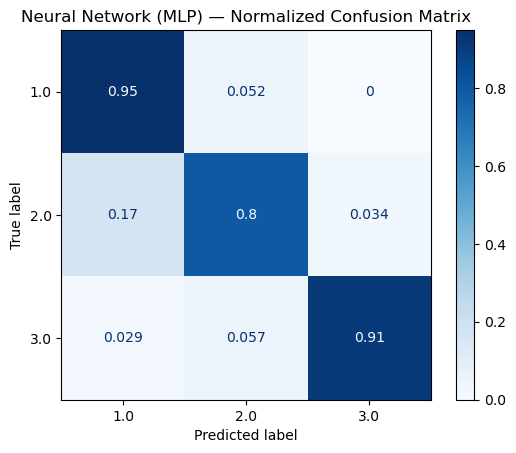

In [28]:
mlp_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(512, 256, 128),  # 3-layer pyramid
        activation='relu',
        alpha=1e-3,                          # lighter L2 regularization
        learning_rate_init=0.001,            # stable LR
        learning_rate='adaptive',
        max_iter=1000,
        early_stopping=True,
        random_state=42
    ))
])

_ = evaluate_model('Neural Network (MLP)', mlp_pipeline, X_train, y_train, X_test, y_test)



Testing config: (256, 128, 64)
MLP (256, 128, 64) — Balanced Accuracy: 0.858, Macro F1: 0.864
NSP 3 Recall: 91.429%
NSP 3 → predicted as NSP 1: 2.857%


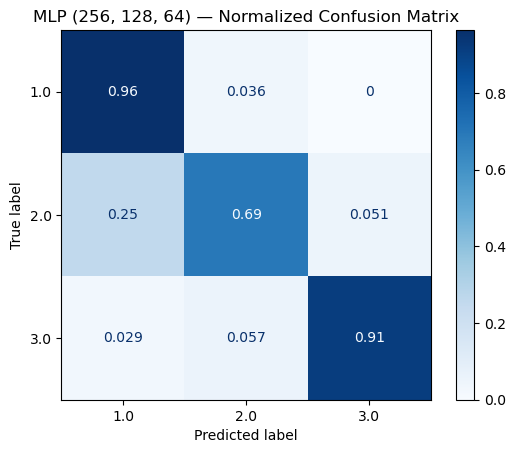


Testing config: (512, 256, 128, 64)
MLP (512, 256, 128, 64) — Balanced Accuracy: 0.884, Macro F1: 0.877
NSP 3 Recall: 91.429%
NSP 3 → predicted as NSP 1: 2.857%


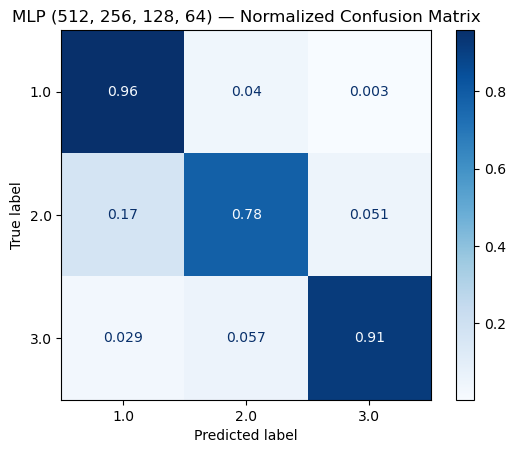


Testing config: (1024, 512, 256)
MLP (1024, 512, 256) — Balanced Accuracy: 0.897, Macro F1: 0.887
NSP 3 Recall: 94.286%
NSP 3 → predicted as NSP 1: 0.000%


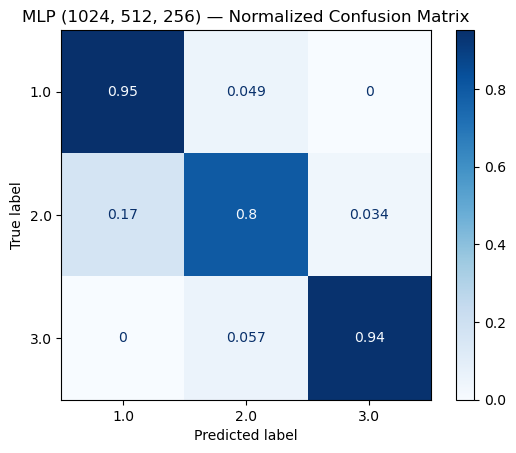


Testing config: (1024, 512, 256, 128)
MLP (1024, 512, 256, 128) — Balanced Accuracy: 0.886, Macro F1: 0.883
NSP 3 Recall: 88.571%
NSP 3 → predicted as NSP 1: 2.857%


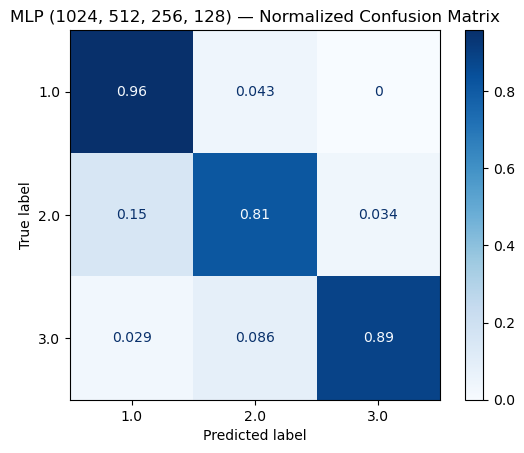

In [29]:
layer_configs = [
    (256, 128, 64),
    (512, 256, 128, 64),
    (1024, 512, 256),
    (1024, 512, 256, 128)
]

results_nn = []

for config in layer_configs:
    mlp_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('mlp', MLPClassifier(
            hidden_layer_sizes=config,
            activation='relu',
            alpha=1e-3,             # you can later try 1e-2 for stronger regularization
            learning_rate='adaptive',
            max_iter=1000,
            early_stopping=True,
            random_state=42
        ))
    ])
    
    print(f"\nTesting config: {config}")
    _, y_pred = evaluate_model(
        f"MLP {config}",
        mlp_pipeline,
        X_train, y_train,
        X_test, y_test,
        display_report=False
    )
